### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,34))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values, fontsize=12) 
    plt.xlabel('Feature importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)


### Obtain

In [2]:
df = pd.read_csv('obtain.csv')


In [3]:
drop_columns = ['Estimate_SEX_AND_AGE_Total_population',
'Estimate_SEX_AND_AGE_Total_population_Male',
'Estimate_SEX_AND_AGE_Total_population_Female',
'Estimate_SEX_AND_AGE_Total_population_Sex_ratio_(males_per_100_females)',
'Estimate_SEX_AND_AGE_Total_population_Under_5_years',
'Estimate_SEX_AND_AGE_Total_population_5_to_9_years',
'Estimate_SEX_AND_AGE_Total_population_10_to_14_years',
'Estimate_SEX_AND_AGE_Total_population_15_to_19_years',
'Estimate_SEX_AND_AGE_Total_population_20_to_24_years',
'Estimate_SEX_AND_AGE_Total_population_25_to_34_years',
'Estimate_SEX_AND_AGE_Total_population_35_to_44_years',
'Estimate_SEX_AND_AGE_Total_population_45_to_54_years',
'Estimate_SEX_AND_AGE_Total_population_55_to_59_years',
'Estimate_SEX_AND_AGE_Total_population_60_to_64_years',
'Estimate_SEX_AND_AGE_Total_population_65_to_74_years',
'Estimate_SEX_AND_AGE_Total_population_75_to_84_years',
'Estimate_SEX_AND_AGE_Total_population_85_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_Median_age_(years)',
'Estimate_SEX_AND_AGE_Total_population_Under_18_years',
'Estimate_SEX_AND_AGE_Total_population_16_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_21_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_62_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over.1',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over_Male',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over_Female',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over_Sex_ratio_(males_per_100_females)',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over.1',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over_Male',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over_Female',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over_Sex_ratio_(males_per_100_females)',
'Estimate_RACE_Total_population_One_race',
'Estimate_RACE_Total_population_Two_or_more_races',
'Estimate_RACE_Total_population_One_race.1',
'Estimate_RACE_Total_population_One_race_White',
'Estimate_RACE_Total_population_One_race_Black_or_African_American',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Cherokee_tribal_grouping',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Chippewa_tribal_grouping',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Navajo_tribal_grouping',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Sioux_tribal_grouping',
'Estimate_RACE_Total_population_One_race_Asian',
'Estimate_RACE_Total_population_One_race_Asian_Asian_Indian',
'Estimate_RACE_Total_population_One_race_Asian_Chinese',
'Estimate_RACE_Total_population_One_race_Asian_Filipino',
'Estimate_RACE_Total_population_One_race_Asian_Japanese',
'Estimate_RACE_Total_population_One_race_Asian_Korean',
'Estimate_RACE_Total_population_One_race_Asian_Vietnamese',
'Estimate_RACE_Total_population_One_race_Asian_Other_Asian',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Native_Hawaiian',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Guamanian_or_Chamorro',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Samoan',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Other_Pacific_Islander',
'Estimate_RACE_Total_population_One_race_Some_other_race',
'Estimate_RACE_Total_population_Two_or_more_races.1',
'Estimate_RACE_Total_population_Two_or_more_races_White_and_Black_or_African_American',
'Estimate_RACE_Total_population_Two_or_more_races_White_and_American_Indian_and_Alaska_Native',
'Estimate_RACE_Total_population_Two_or_more_races_White_and_Asian',
'Estimate_RACE_Total_population_Two_or_more_races_Black_or_African_American_and_American_Indian_and_Alaska_Native',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_White',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Black_or_African_American',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_American_Indian_and_Alaska_Native',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Asian',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Native_Hawaiian_and_Other_Pacific_Islander',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Some_other_race',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Mexican',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Puerto_Rican',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Cuban',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_White_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Black_or_African_American_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_American_Indian_and_Alaska_Native_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Asian_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Native_Hawaiian_and_Other_Pacific_Islander_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Some_other_race_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Two_or_more_races',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Two_or_more_races_Two_races_including_Some_other_race',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Two_or_more_races_Two_races_excluding_Some_other_race_and_Three_or_more_races',
'Estimate_Total_housing_units',
'Estimate_CITIZEN_VOTING_AGE_POPULATION_Citizen_18_and_over_population',
'Estimate_CITIZEN_VOTING_AGE_POPULATION_Citizen_18_and_over_population_Male',
'Estimate_CITIZEN_VOTING_AGE_POPULATION_Citizen_18_and_over_population_Female',
'_Total_Discharges_',
'DRG_label',
'without_ccmcc',
'with_mcc',
'with_cc',
'with_ccmcc',
'ratio_to_max_payment',
'ratio_to_max_discharge']

change_columns = ['Estimate_SEX_AND_AGE_Total_population_Male',
'Estimate_SEX_AND_AGE_Total_population_Female',
'Estimate_SEX_AND_AGE_Total_population_Under_5_years',
'Estimate_SEX_AND_AGE_Total_population_5_to_9_years',
'Estimate_SEX_AND_AGE_Total_population_10_to_14_years',
'Estimate_SEX_AND_AGE_Total_population_15_to_19_years',
'Estimate_SEX_AND_AGE_Total_population_20_to_24_years',
'Estimate_SEX_AND_AGE_Total_population_25_to_34_years',
'Estimate_SEX_AND_AGE_Total_population_35_to_44_years',
'Estimate_SEX_AND_AGE_Total_population_45_to_54_years',
'Estimate_SEX_AND_AGE_Total_population_55_to_59_years',
'Estimate_SEX_AND_AGE_Total_population_60_to_64_years',
'Estimate_SEX_AND_AGE_Total_population_65_to_74_years',
'Estimate_SEX_AND_AGE_Total_population_75_to_84_years',
'Estimate_SEX_AND_AGE_Total_population_85_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_Median_age_(years)',
'Estimate_SEX_AND_AGE_Total_population_Under_18_years',
'Estimate_SEX_AND_AGE_Total_population_16_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_21_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_62_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over.1',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over_Male',
'Estimate_SEX_AND_AGE_Total_population_18_years_and_over_Female',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over.1',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over_Male',
'Estimate_SEX_AND_AGE_Total_population_65_years_and_over_Female',
'Estimate_RACE_Total_population_One_race',
'Estimate_RACE_Total_population_Two_or_more_races',
'Estimate_RACE_Total_population_One_race.1',
'Estimate_RACE_Total_population_One_race_White',
'Estimate_RACE_Total_population_One_race_Black_or_African_American',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Cherokee_tribal_grouping',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Chippewa_tribal_grouping',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Navajo_tribal_grouping',
'Estimate_RACE_Total_population_One_race_American_Indian_and_Alaska_Native_Sioux_tribal_grouping',
'Estimate_RACE_Total_population_One_race_Asian',
'Estimate_RACE_Total_population_One_race_Asian_Asian_Indian',
'Estimate_RACE_Total_population_One_race_Asian_Chinese',
'Estimate_RACE_Total_population_One_race_Asian_Filipino',
'Estimate_RACE_Total_population_One_race_Asian_Japanese',
'Estimate_RACE_Total_population_One_race_Asian_Korean',
'Estimate_RACE_Total_population_One_race_Asian_Vietnamese',
'Estimate_RACE_Total_population_One_race_Asian_Other_Asian',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Native_Hawaiian',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Guamanian_or_Chamorro',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Samoan',
'Estimate_RACE_Total_population_One_race_Native_Hawaiian_and_Other_Pacific_Islander_Other_Pacific_Islander',
'Estimate_RACE_Total_population_One_race_Some_other_race',
'Estimate_RACE_Total_population_Two_or_more_races.1',
'Estimate_RACE_Total_population_Two_or_more_races_White_and_Black_or_African_American',
'Estimate_RACE_Total_population_Two_or_more_races_White_and_American_Indian_and_Alaska_Native',
'Estimate_RACE_Total_population_Two_or_more_races_White_and_Asian',
'Estimate_RACE_Total_population_Two_or_more_races_Black_or_African_American_and_American_Indian_and_Alaska_Native',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_White',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Black_or_African_American',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_American_Indian_and_Alaska_Native',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Asian',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Native_Hawaiian_and_Other_Pacific_Islander',
'Estimate_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_Some_other_race',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Mexican',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Puerto_Rican',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Cuban',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_White_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Black_or_African_American_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_American_Indian_and_Alaska_Native_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Asian_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Native_Hawaiian_and_Other_Pacific_Islander_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Some_other_race_alone',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Two_or_more_races',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Two_or_more_races_Two_races_including_Some_other_race',
'Estimate_HISPANIC_OR_LATINO_AND_RACE_Total_population_Not_Hispanic_or_Latino_Two_or_more_races_Two_races_excluding_Some_other_race_and_Three_or_more_races',
'Estimate_CITIZEN_VOTING_AGE_POPULATION_Citizen_18_and_over_population',
'Estimate_CITIZEN_VOTING_AGE_POPULATION_Citizen_18_and_over_population_Male',
'Estimate_CITIZEN_VOTING_AGE_POPULATION_Citizen_18_and_over_population_Female']

In [4]:
data = df[drop_columns]
count= 1
transfer_dict = {}
for i in change_columns:
    transfer_dict[i] = data[i]/ data.Estimate_SEX_AND_AGE_Total_population
    count+=1
for i in transfer_dict.keys():
    data[i] = transfer_dict[i]
data = pd.get_dummies(data)
data = data.drop(columns=data.columns[97:547])

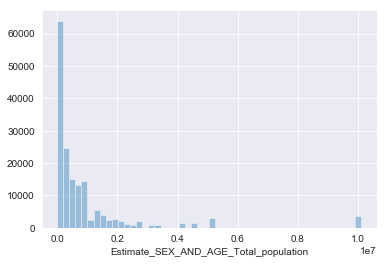

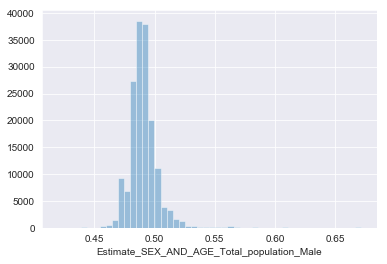

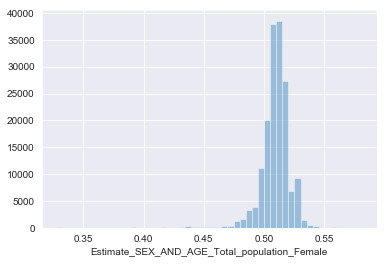

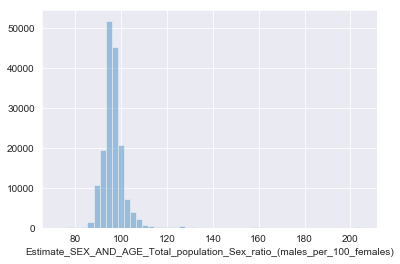

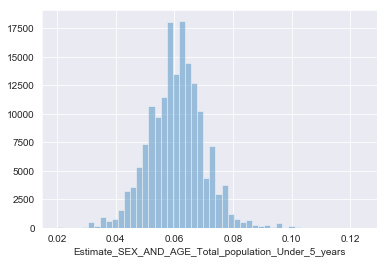

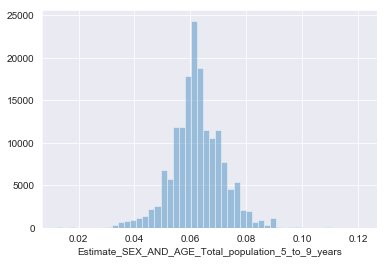

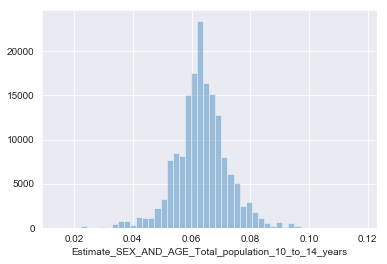

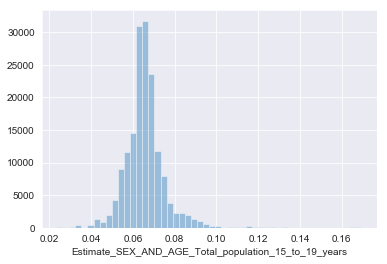

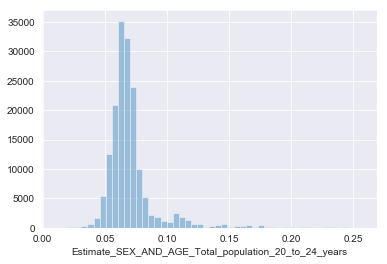

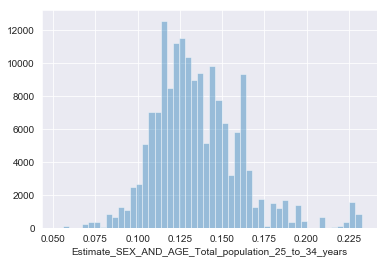

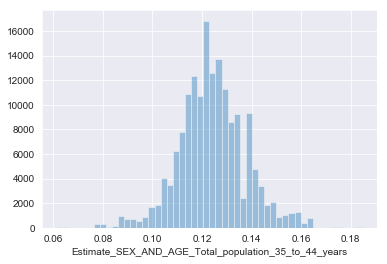

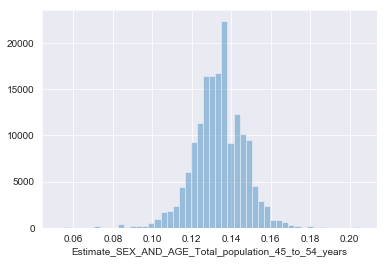

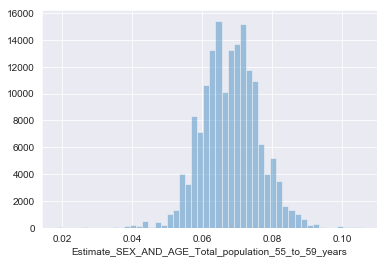

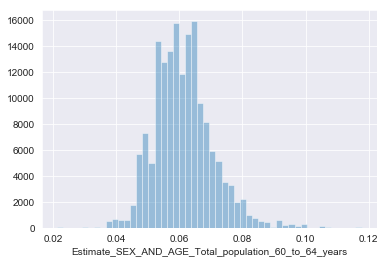

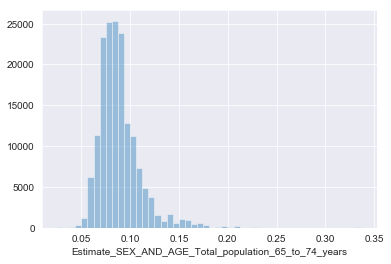

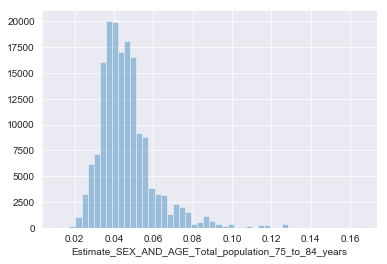

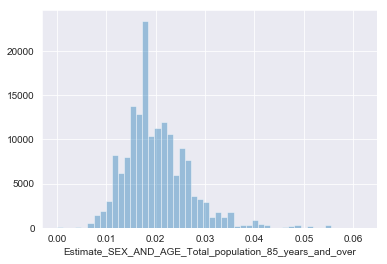

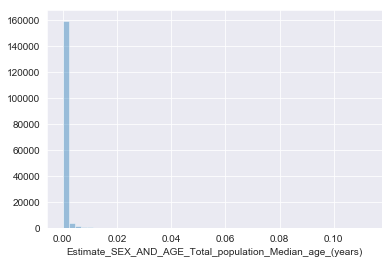

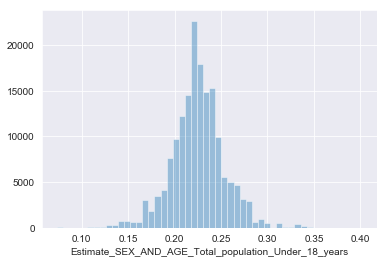

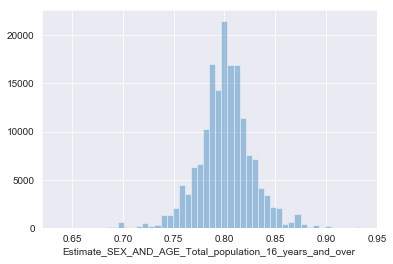

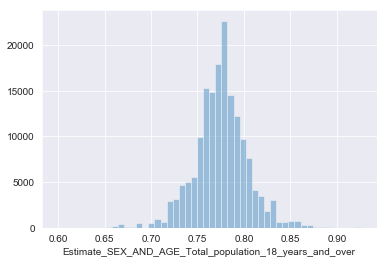

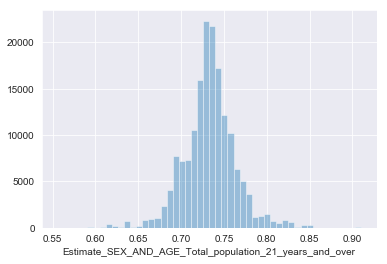

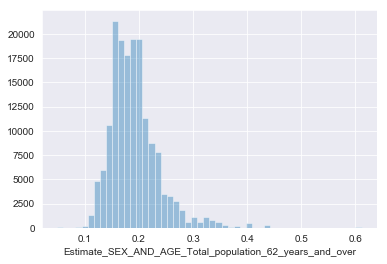

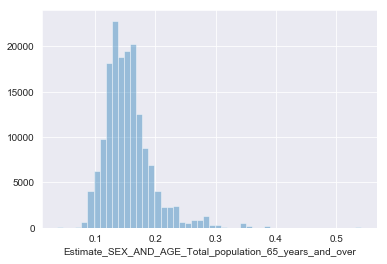

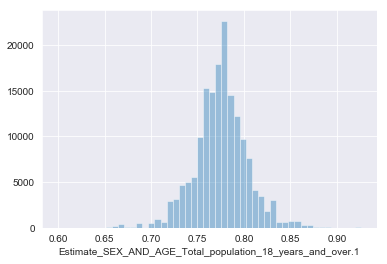

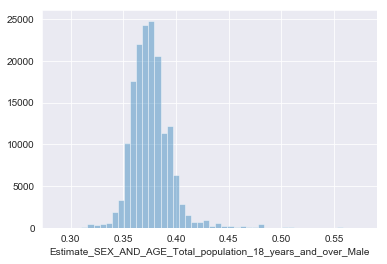

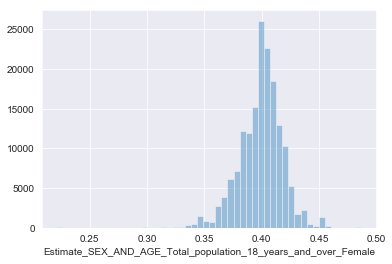

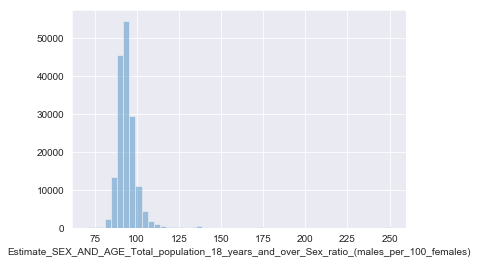

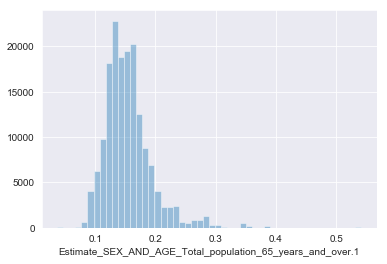

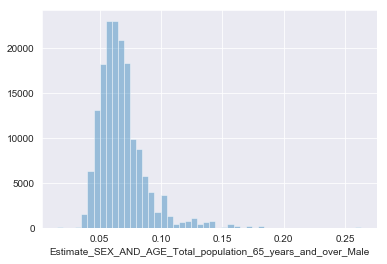

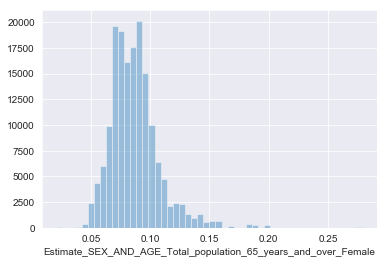

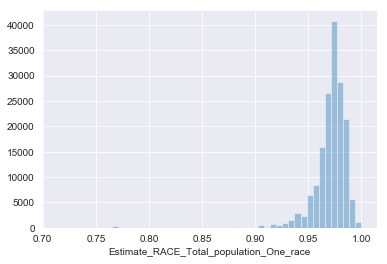

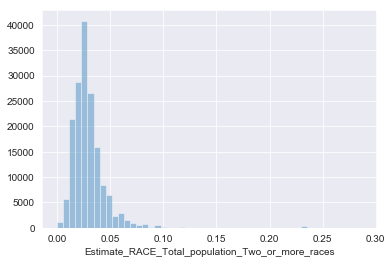

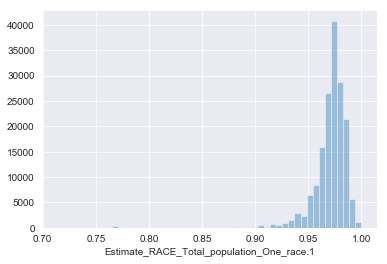

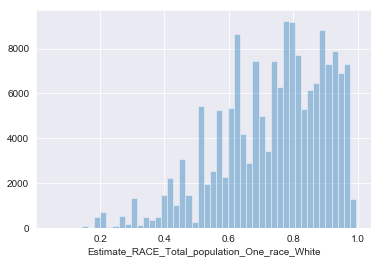

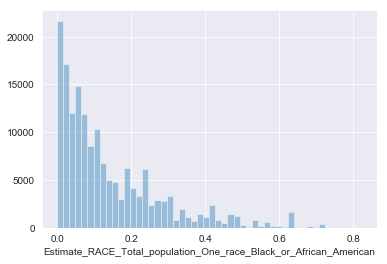

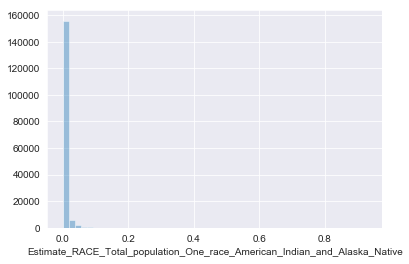

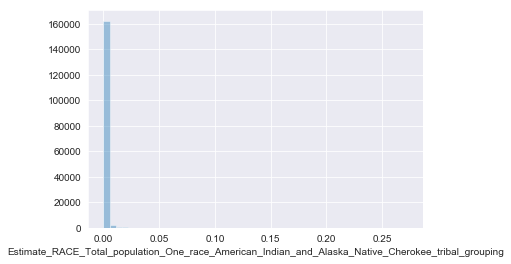

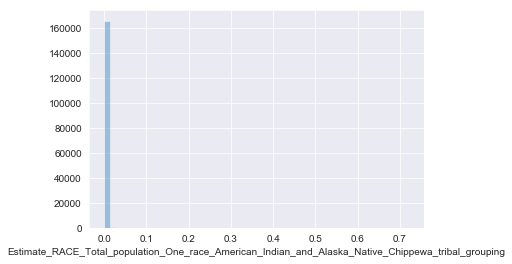

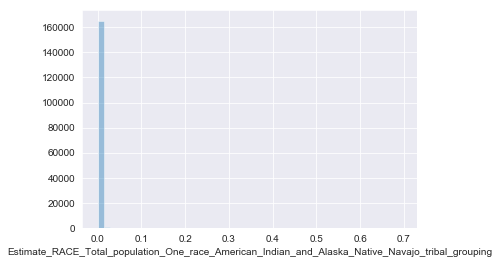

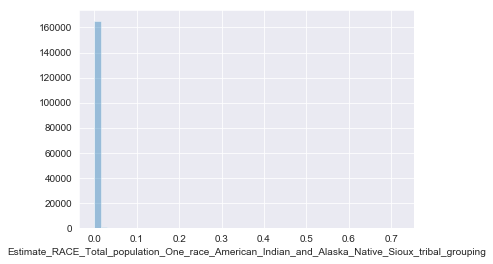

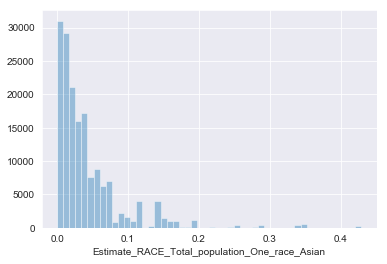

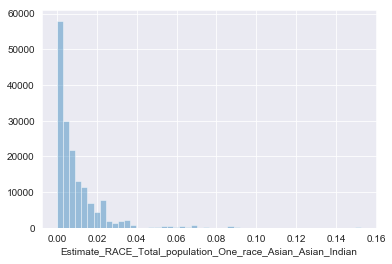

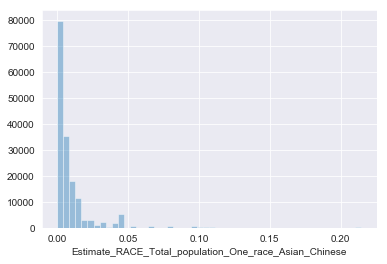

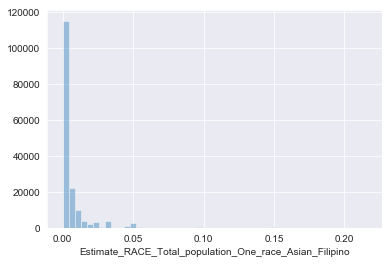

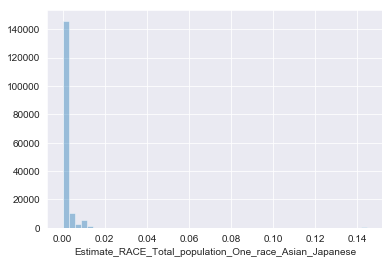

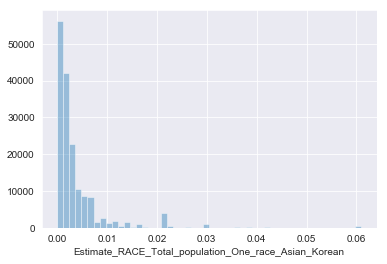

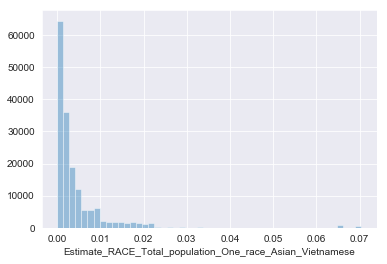

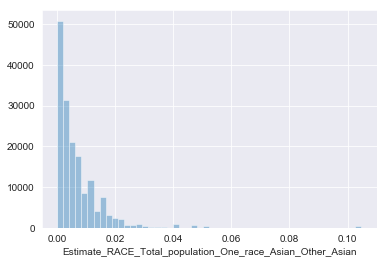

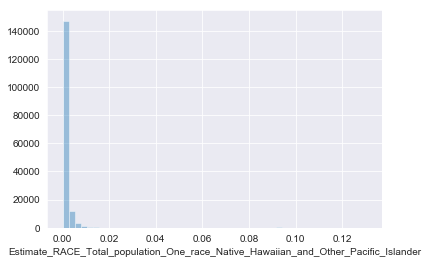

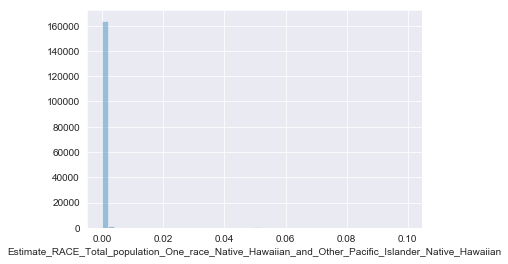

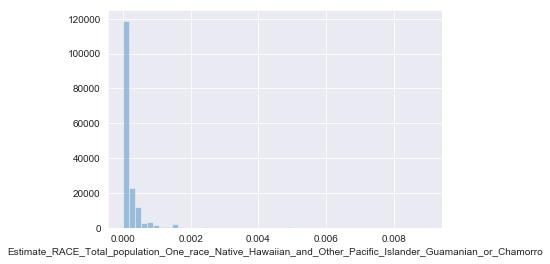

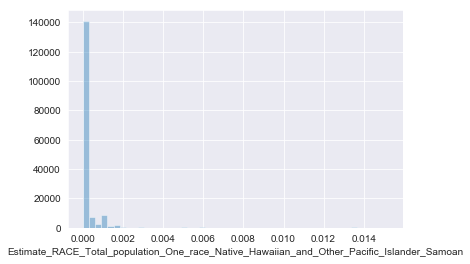

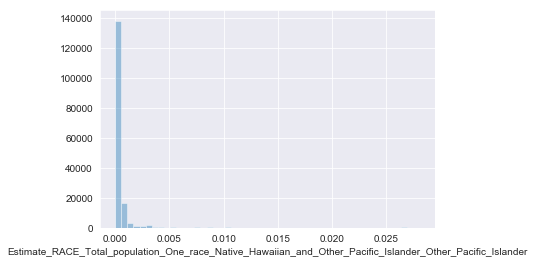

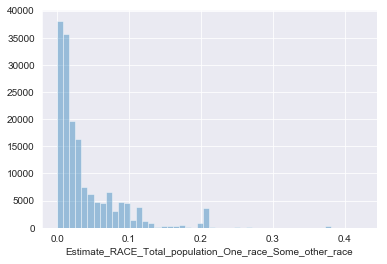

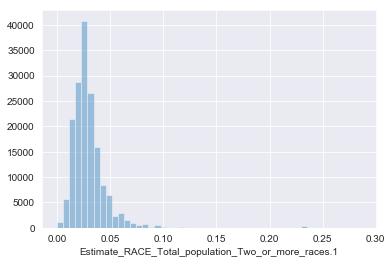

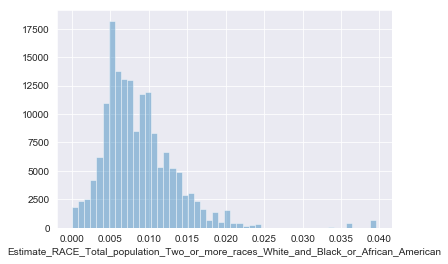

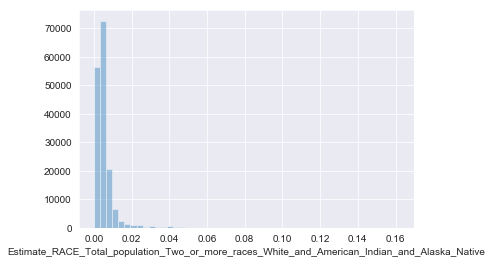

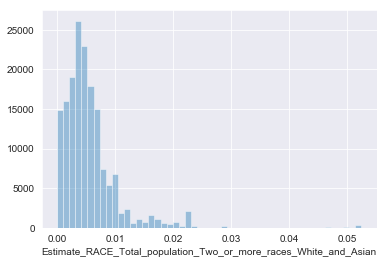

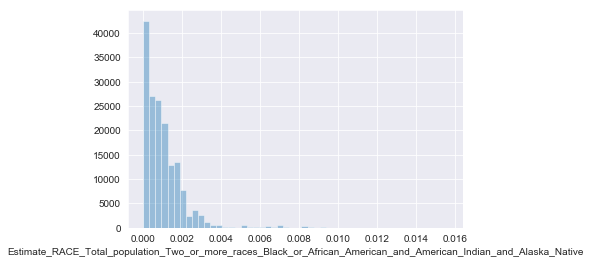

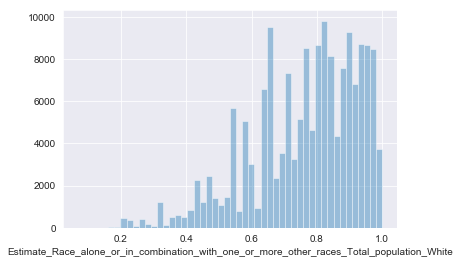

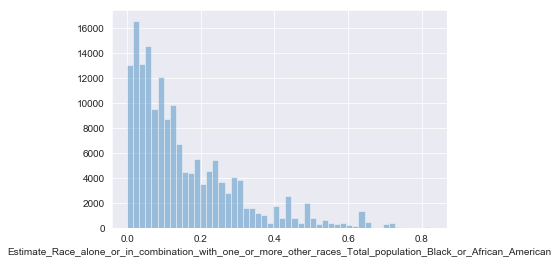

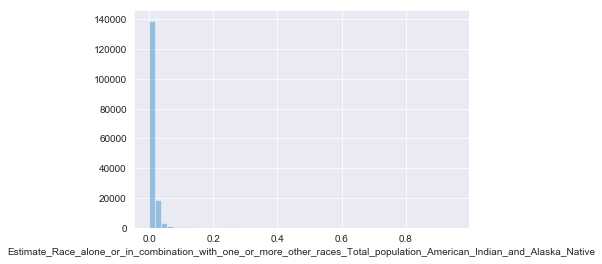

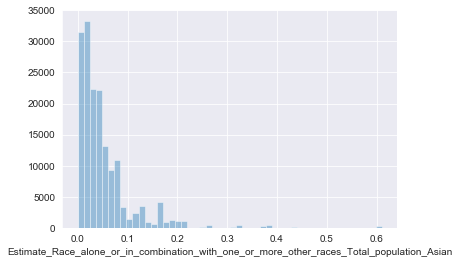

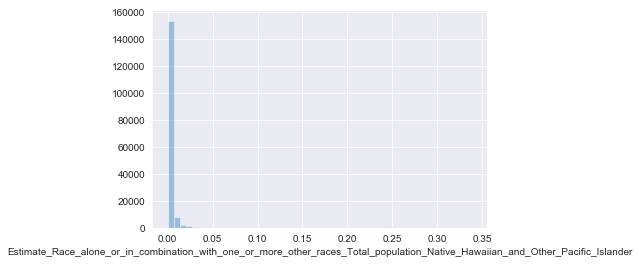

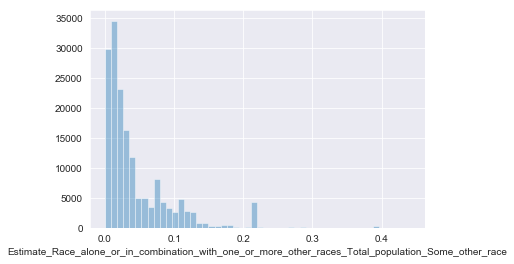

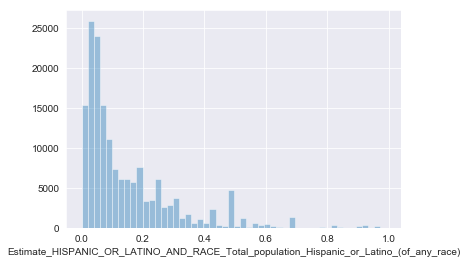

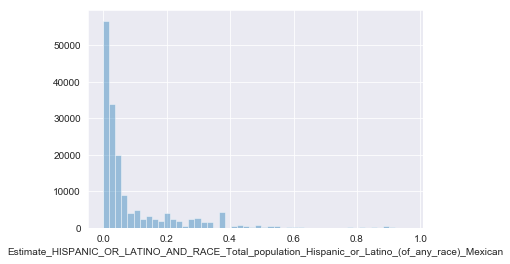

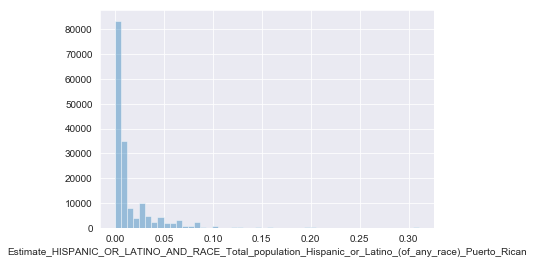

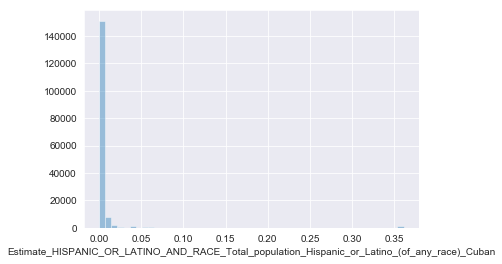

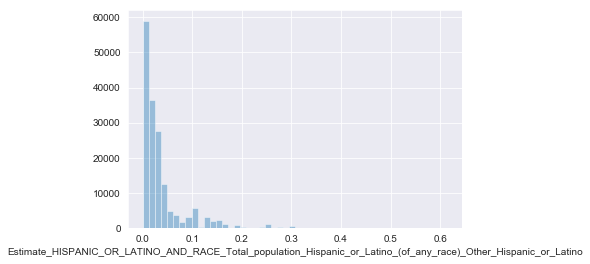

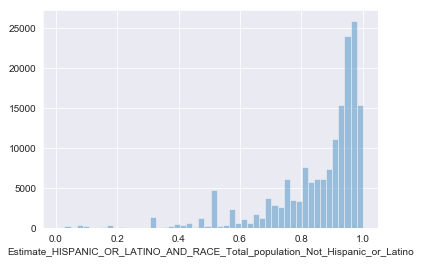

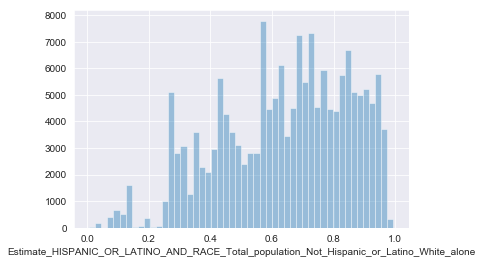

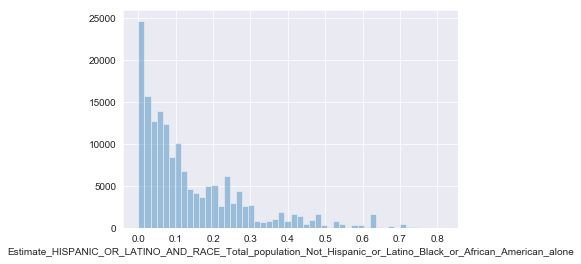

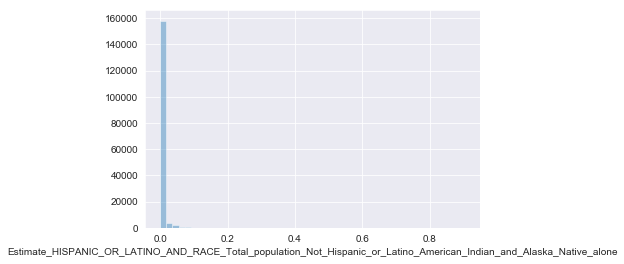

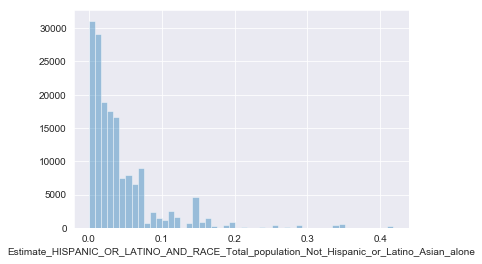

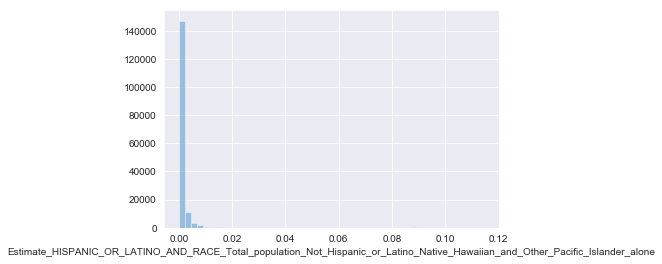

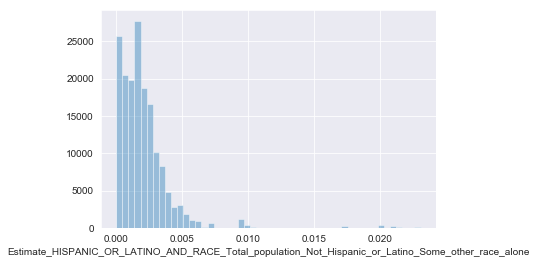

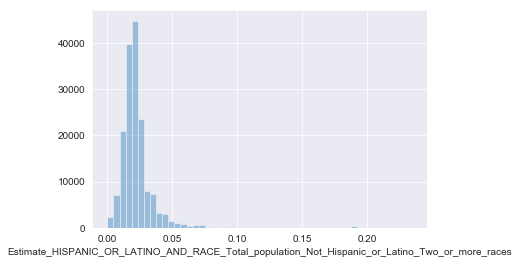

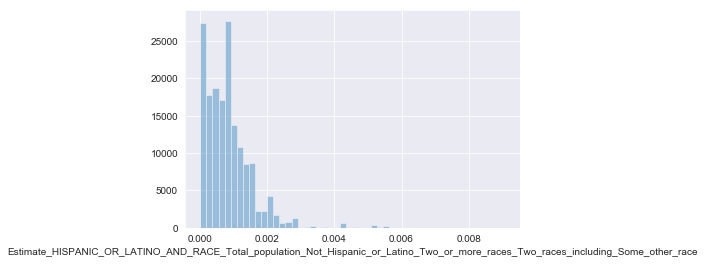

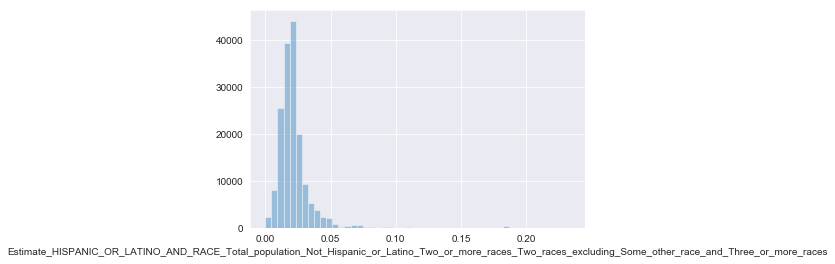

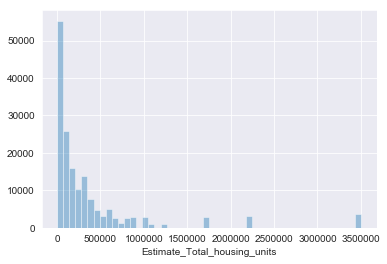

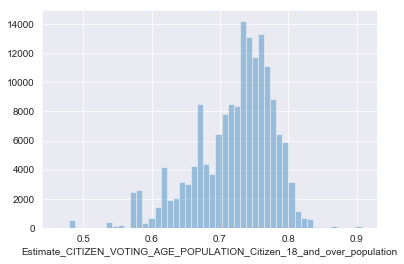

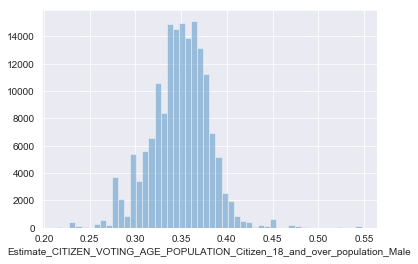

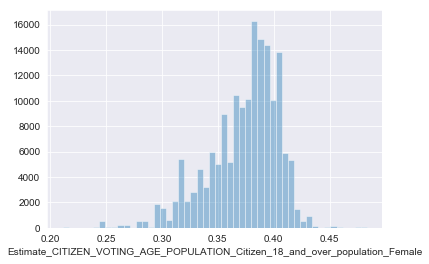

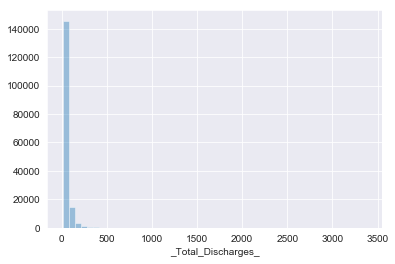

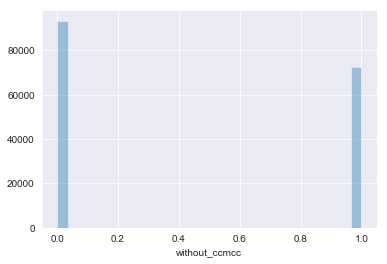

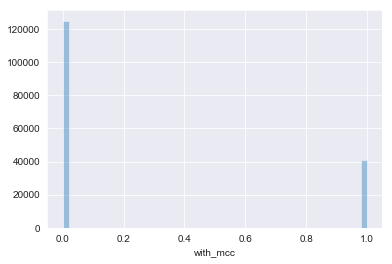

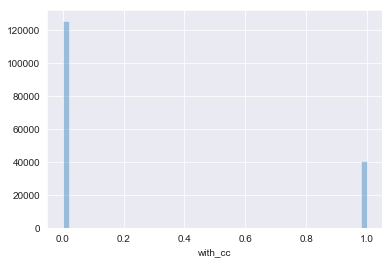

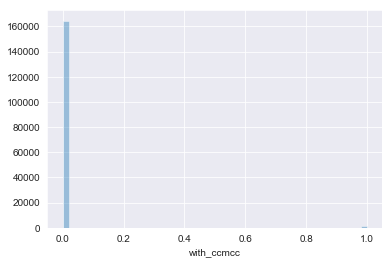

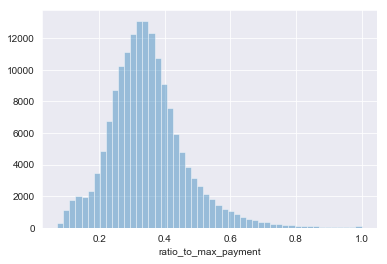

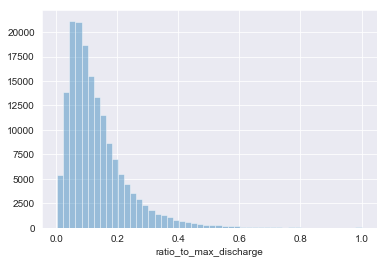

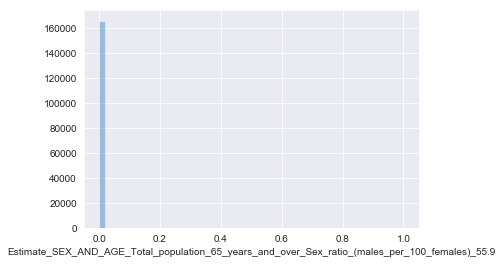

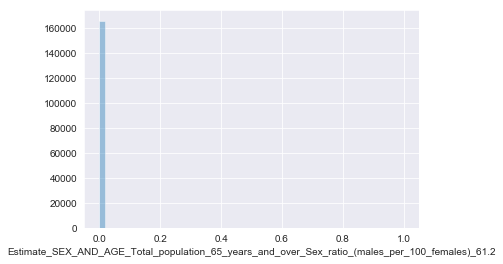

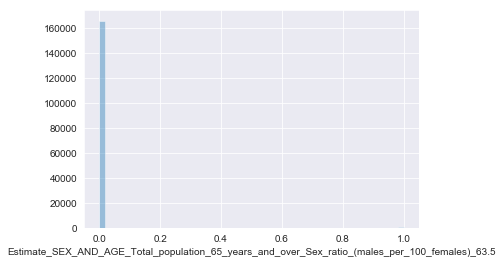

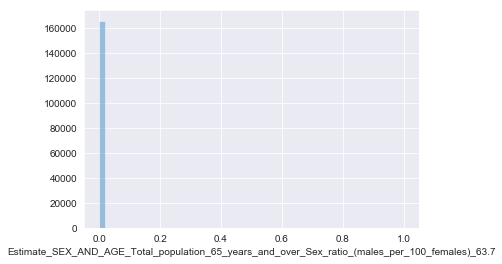

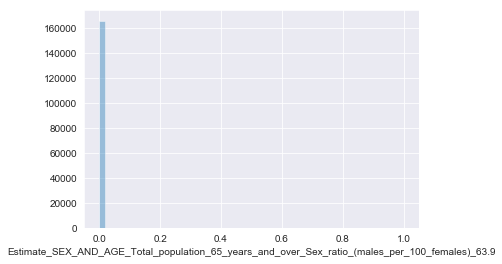

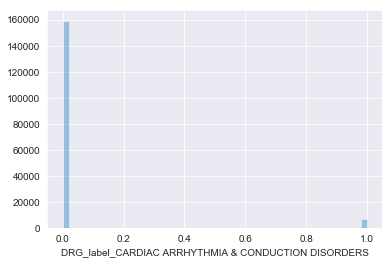

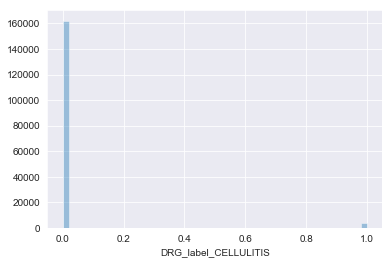

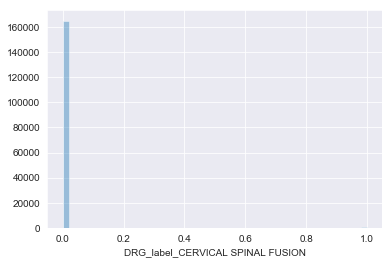

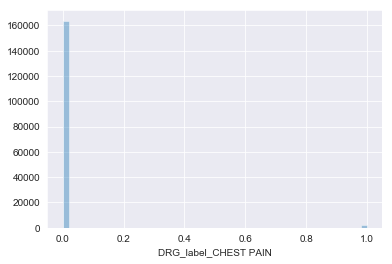

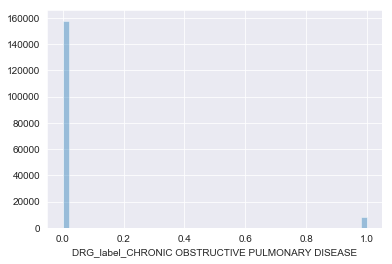

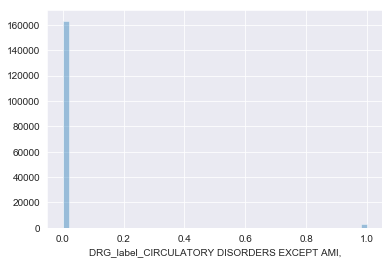

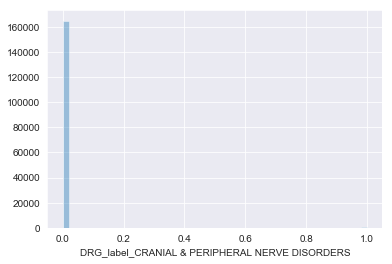

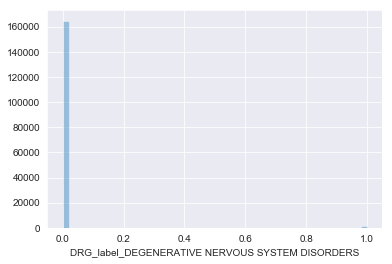

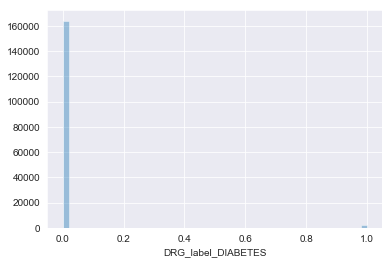

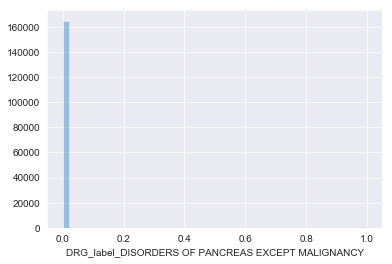

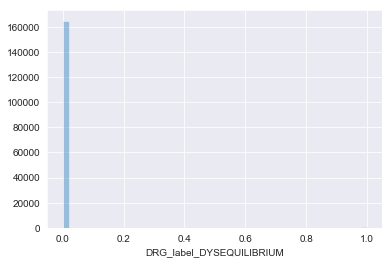

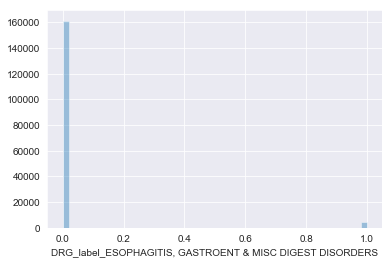

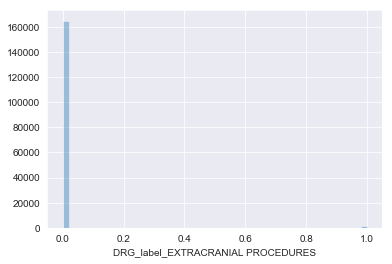

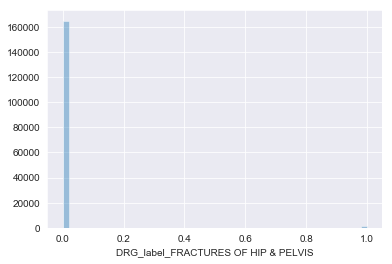

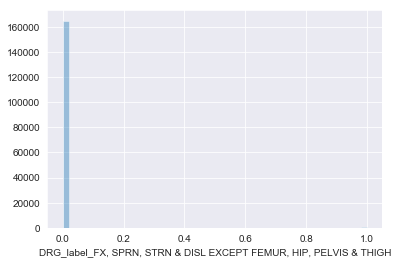

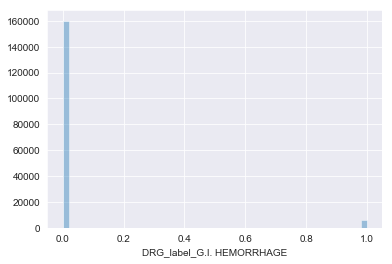

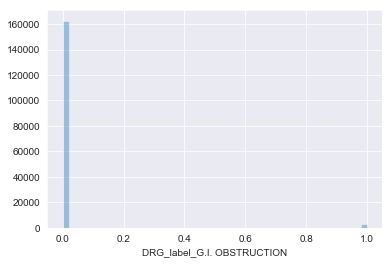

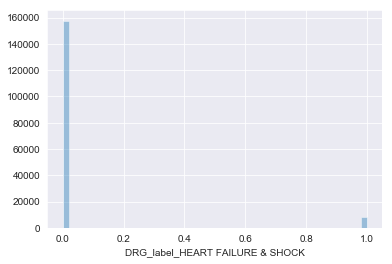

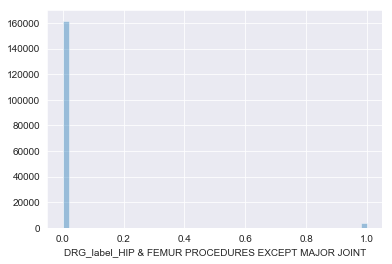

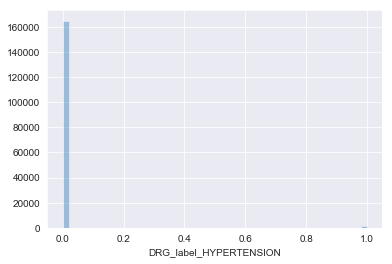

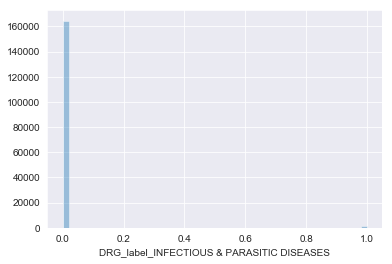

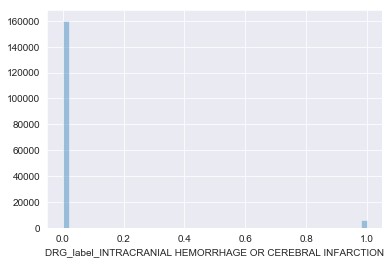

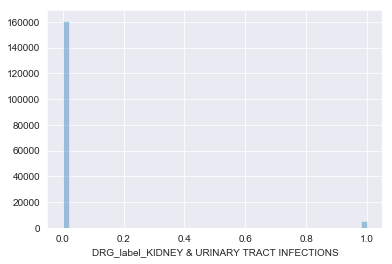

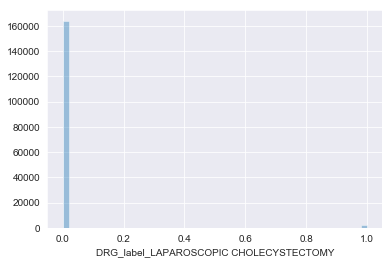

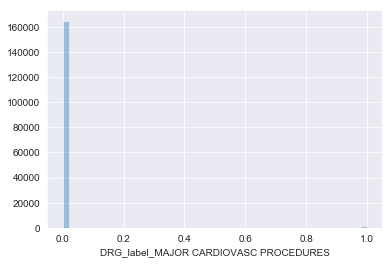

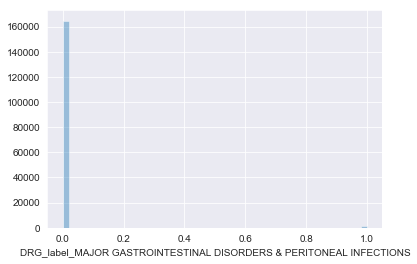

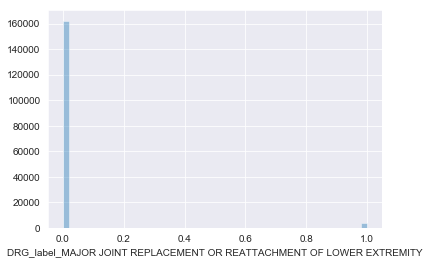

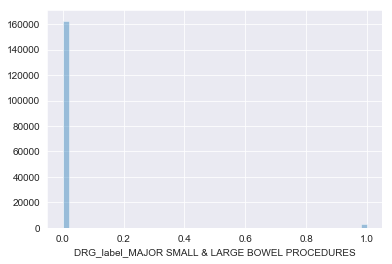

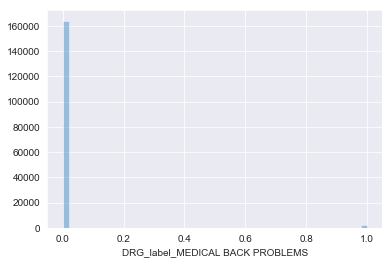

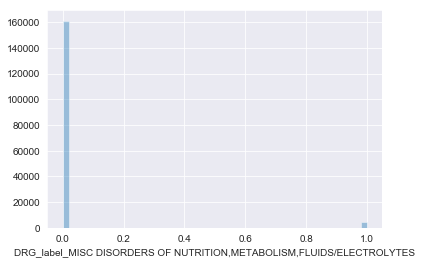

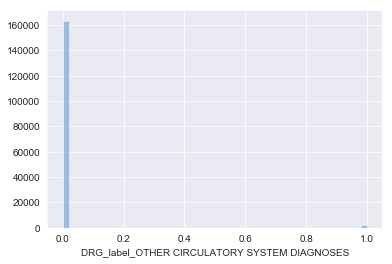

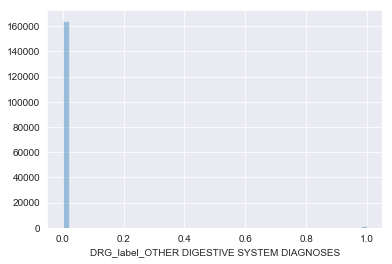

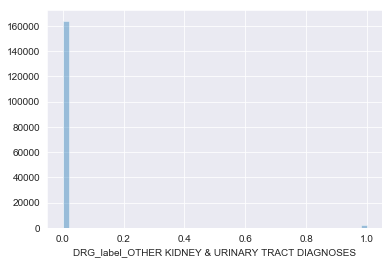

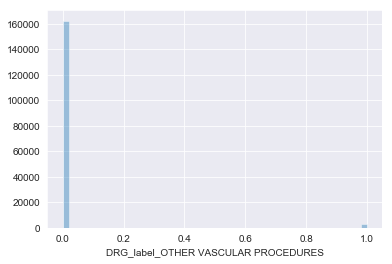

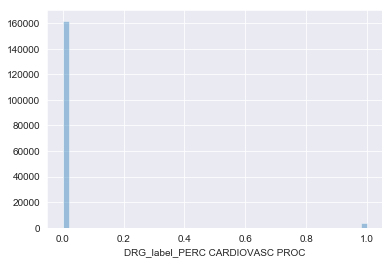

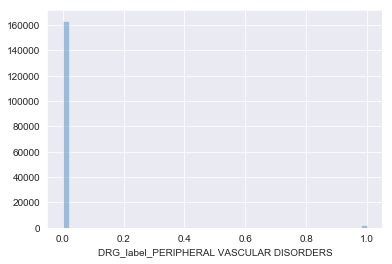

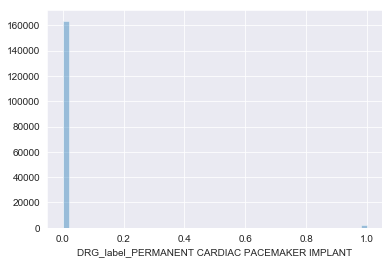

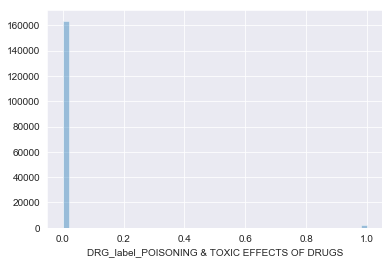

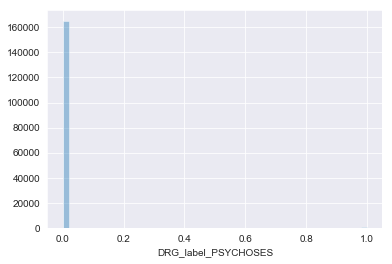

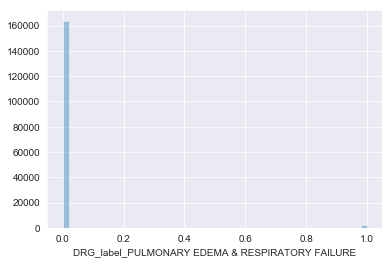

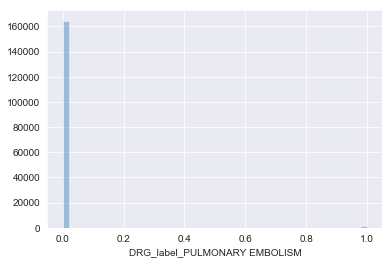

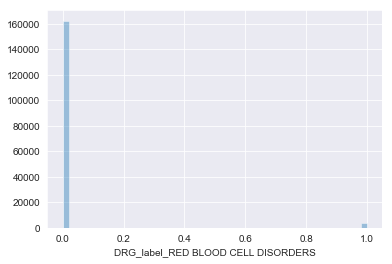

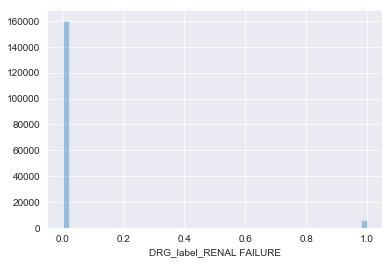

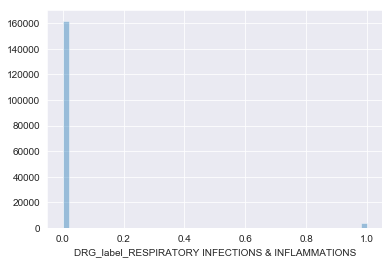

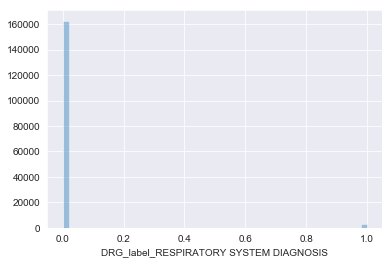

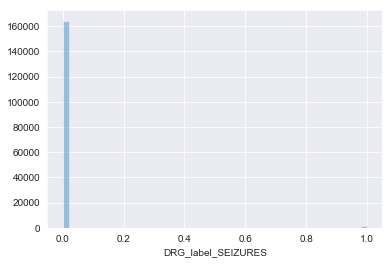

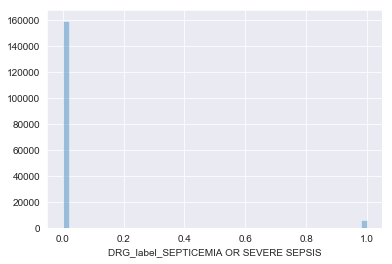

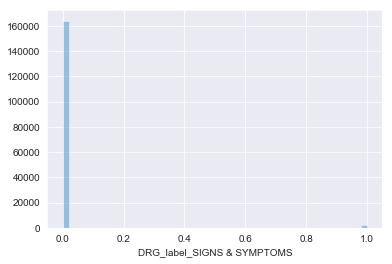

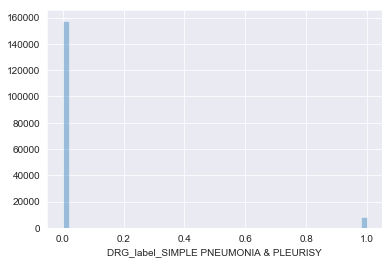

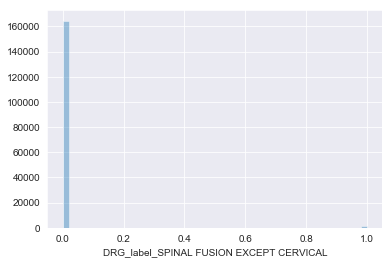

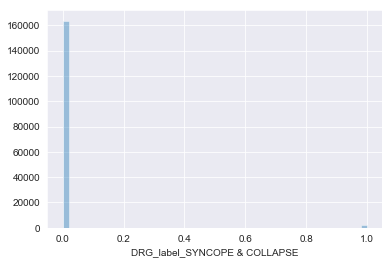

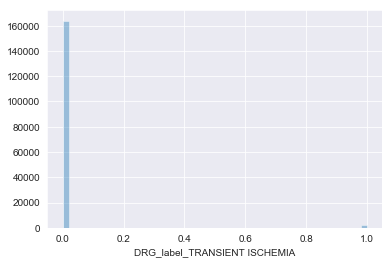

In [5]:
count = 1
for i in data.columns:
    
    sns.distplot(data[i], kde= False)
    plt.show()

In [6]:
data.ratio_to_max_payment.std()+data.ratio_to_max_payment.mean()

0.46446389871300564

In [7]:
target_column='ratio_to_max_payment'
#y = pd.cut(data[target_column],3).astype(str)
y= data.ratio_to_max_payment >= data.ratio_to_max_payment.std()+data.ratio_to_max_payment.mean()
X = data.drop(columns=[target_column])
data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                    test_size = 0.25)


forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, max_features=20)
forest.fit(data_train,target_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

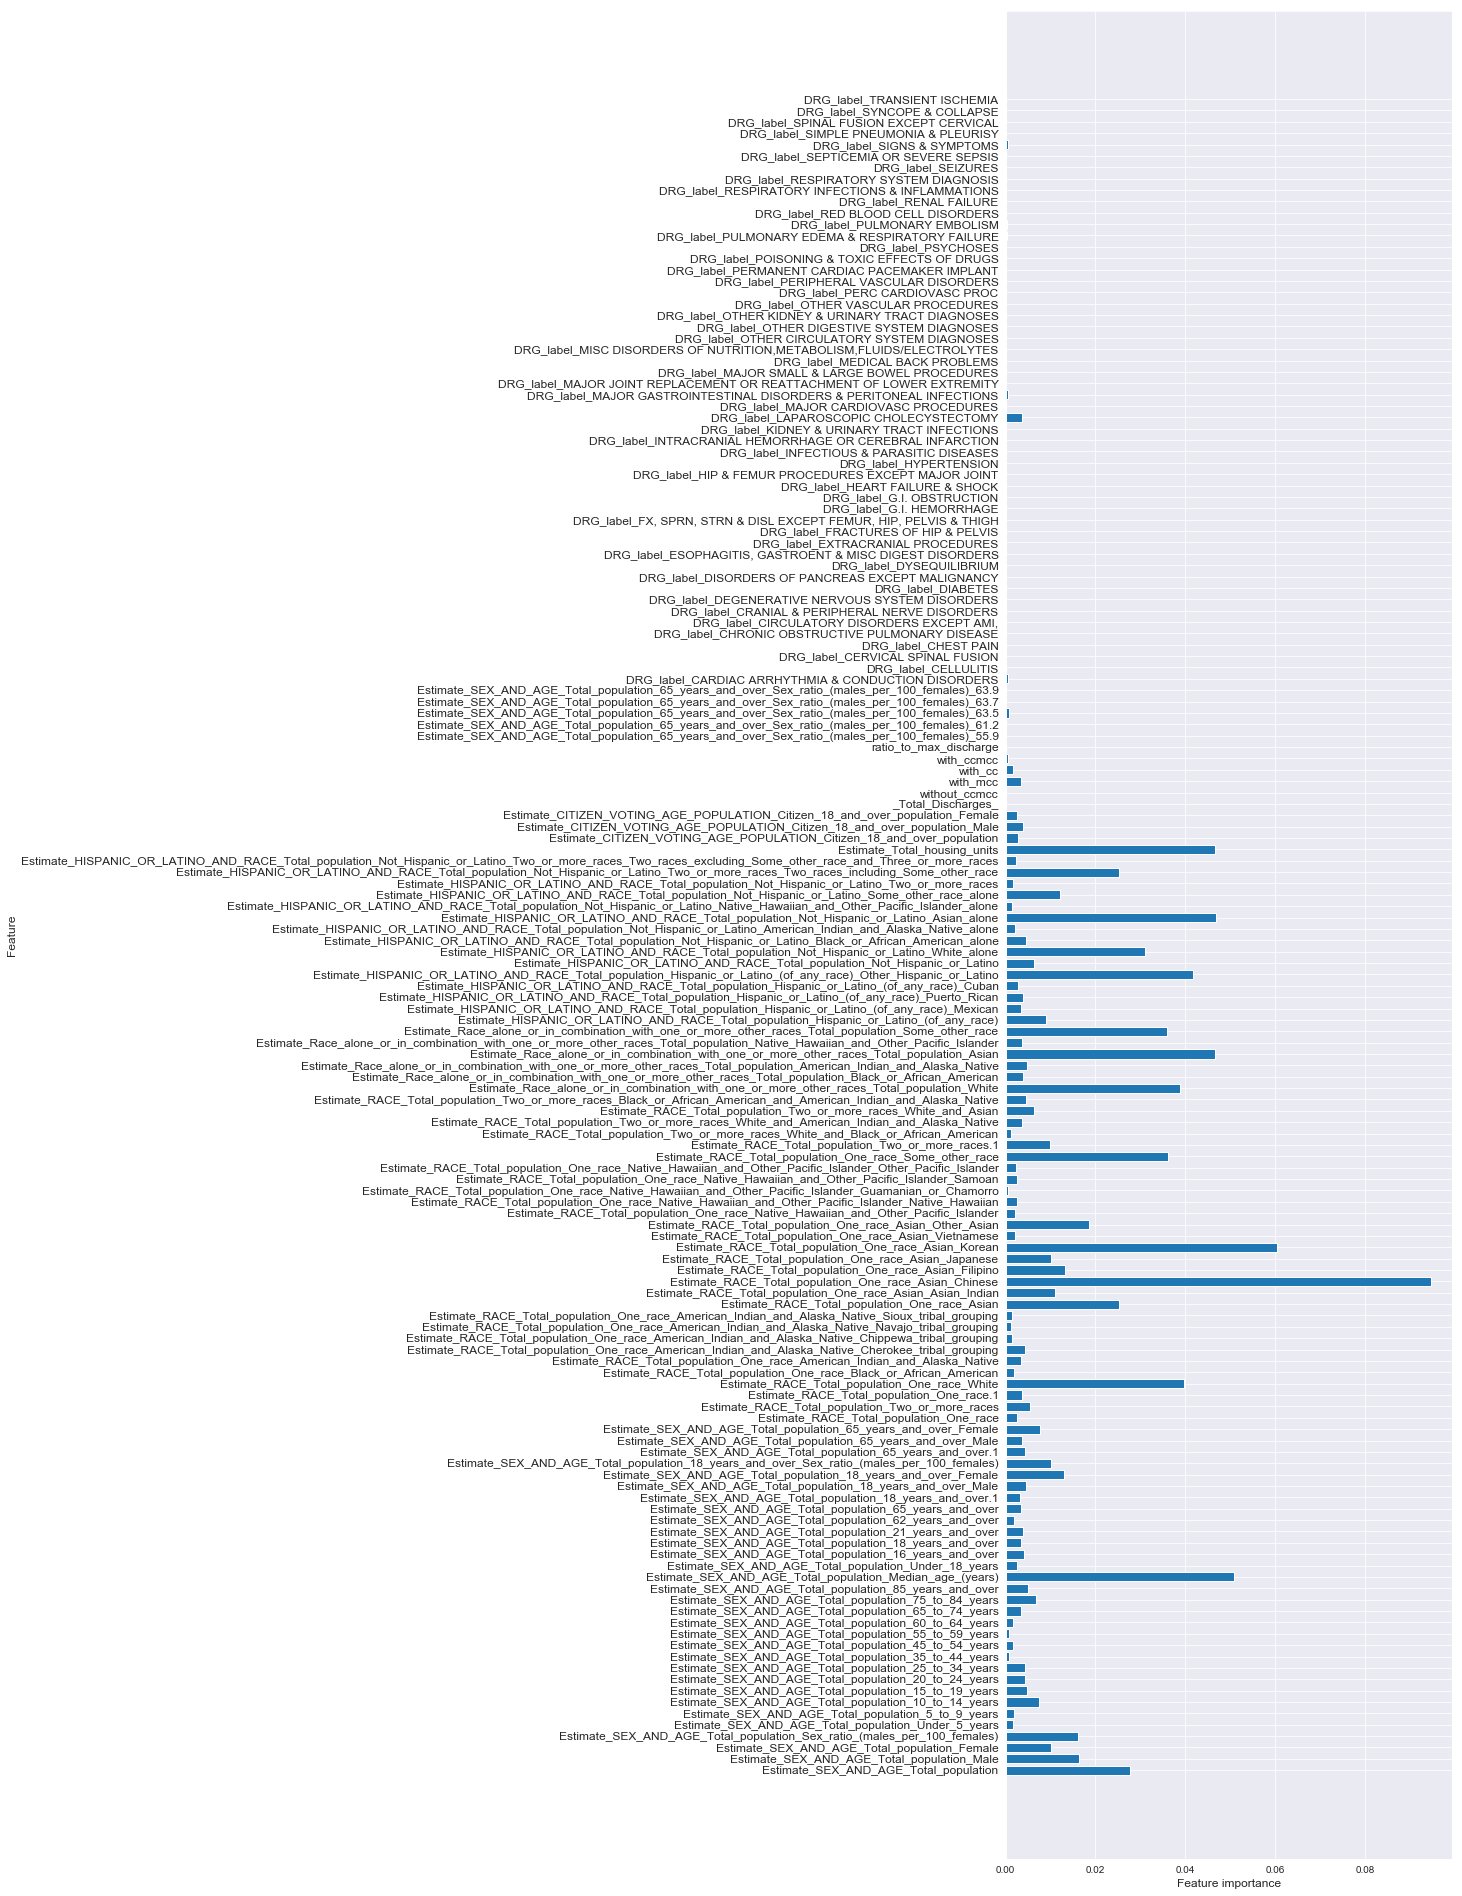

In [8]:
plot_feature_importances(forest)

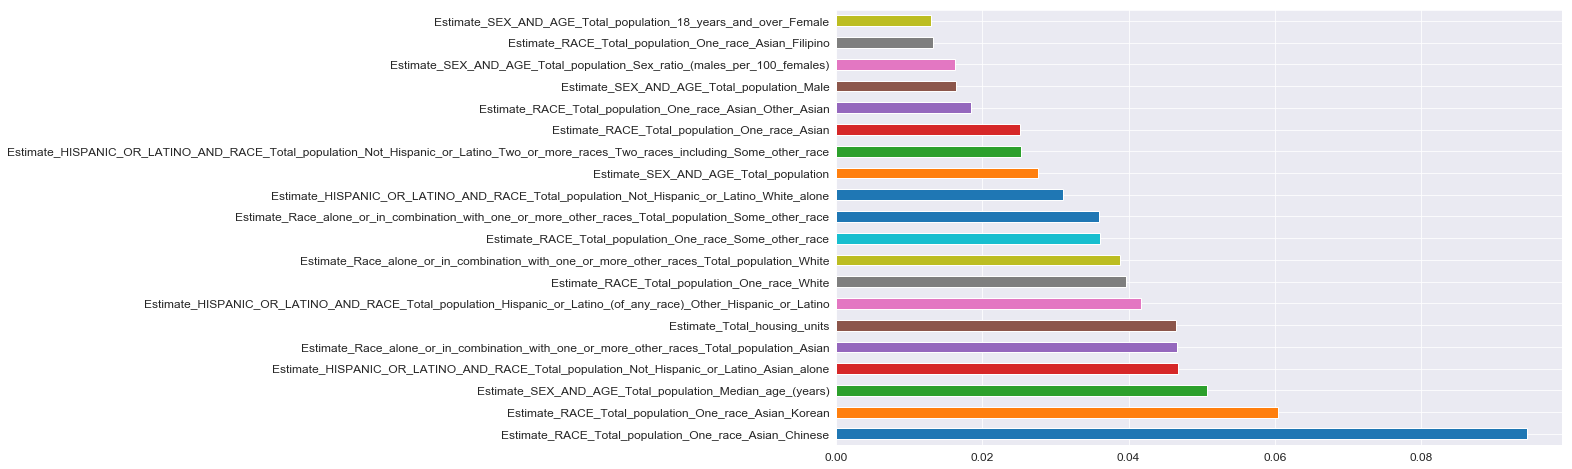

In [9]:
plt.figure(figsize=(13,8))
pd.Series(data = forest.feature_importances_, 
          index= X.columns).sort_values(ascending=False).iloc[:20].plot.barh(fontsize=12);
plt.xticks(fontsize=12)
feature = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False).iloc[:20]


In [10]:
forest.score(data_train,target_train)


0.8820981751854143

In [11]:
confusion_matrix(target_train, forest.predict(data_train))

array([[107199,   1117],
       [ 13556,   2579]], dtype=int64)

In [12]:
print(classification_report(target_train, forest.predict(data_train)))

              precision    recall  f1-score   support

       False       0.89      0.99      0.94    108316
        True       0.70      0.16      0.26     16135

    accuracy                           0.88    124451
   macro avg       0.79      0.57      0.60    124451
weighted avg       0.86      0.88      0.85    124451



In [13]:
forest.score(data_test,target_test)

0.881785748722399

In [14]:
df_feature_importance = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False)

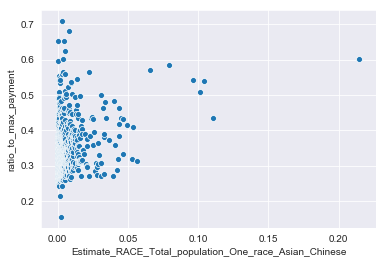

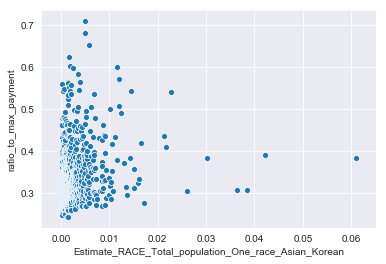

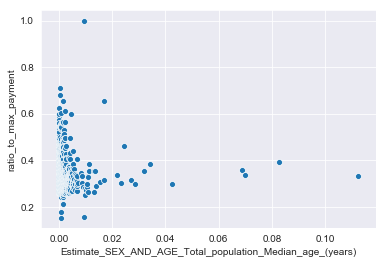

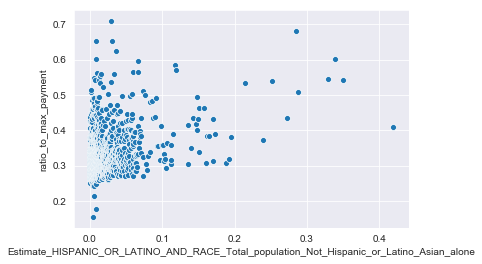

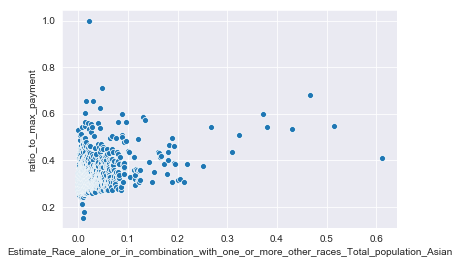

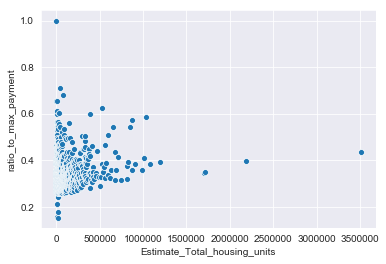

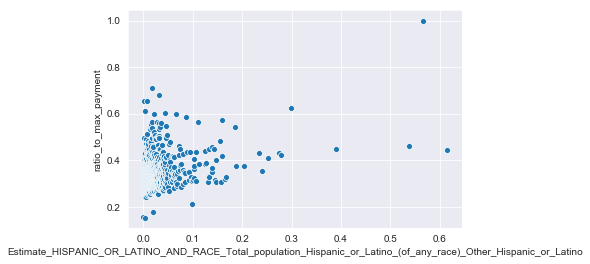

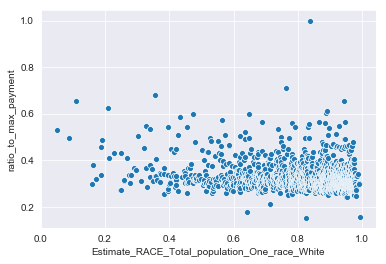

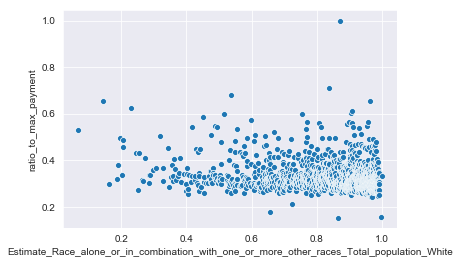

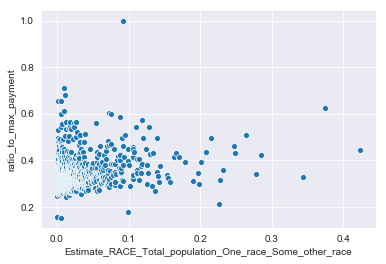

In [15]:
for i in df_feature_importance.index[:10]:
    a = data.groupby(by=i)[target_column].mean()
    sns.scatterplot(x=a.index, y=a)
    plt.show()

In [16]:
X = X[feature.index[:10]]

In [17]:
data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                    test_size = 0.25)


forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
forest.fit(data_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

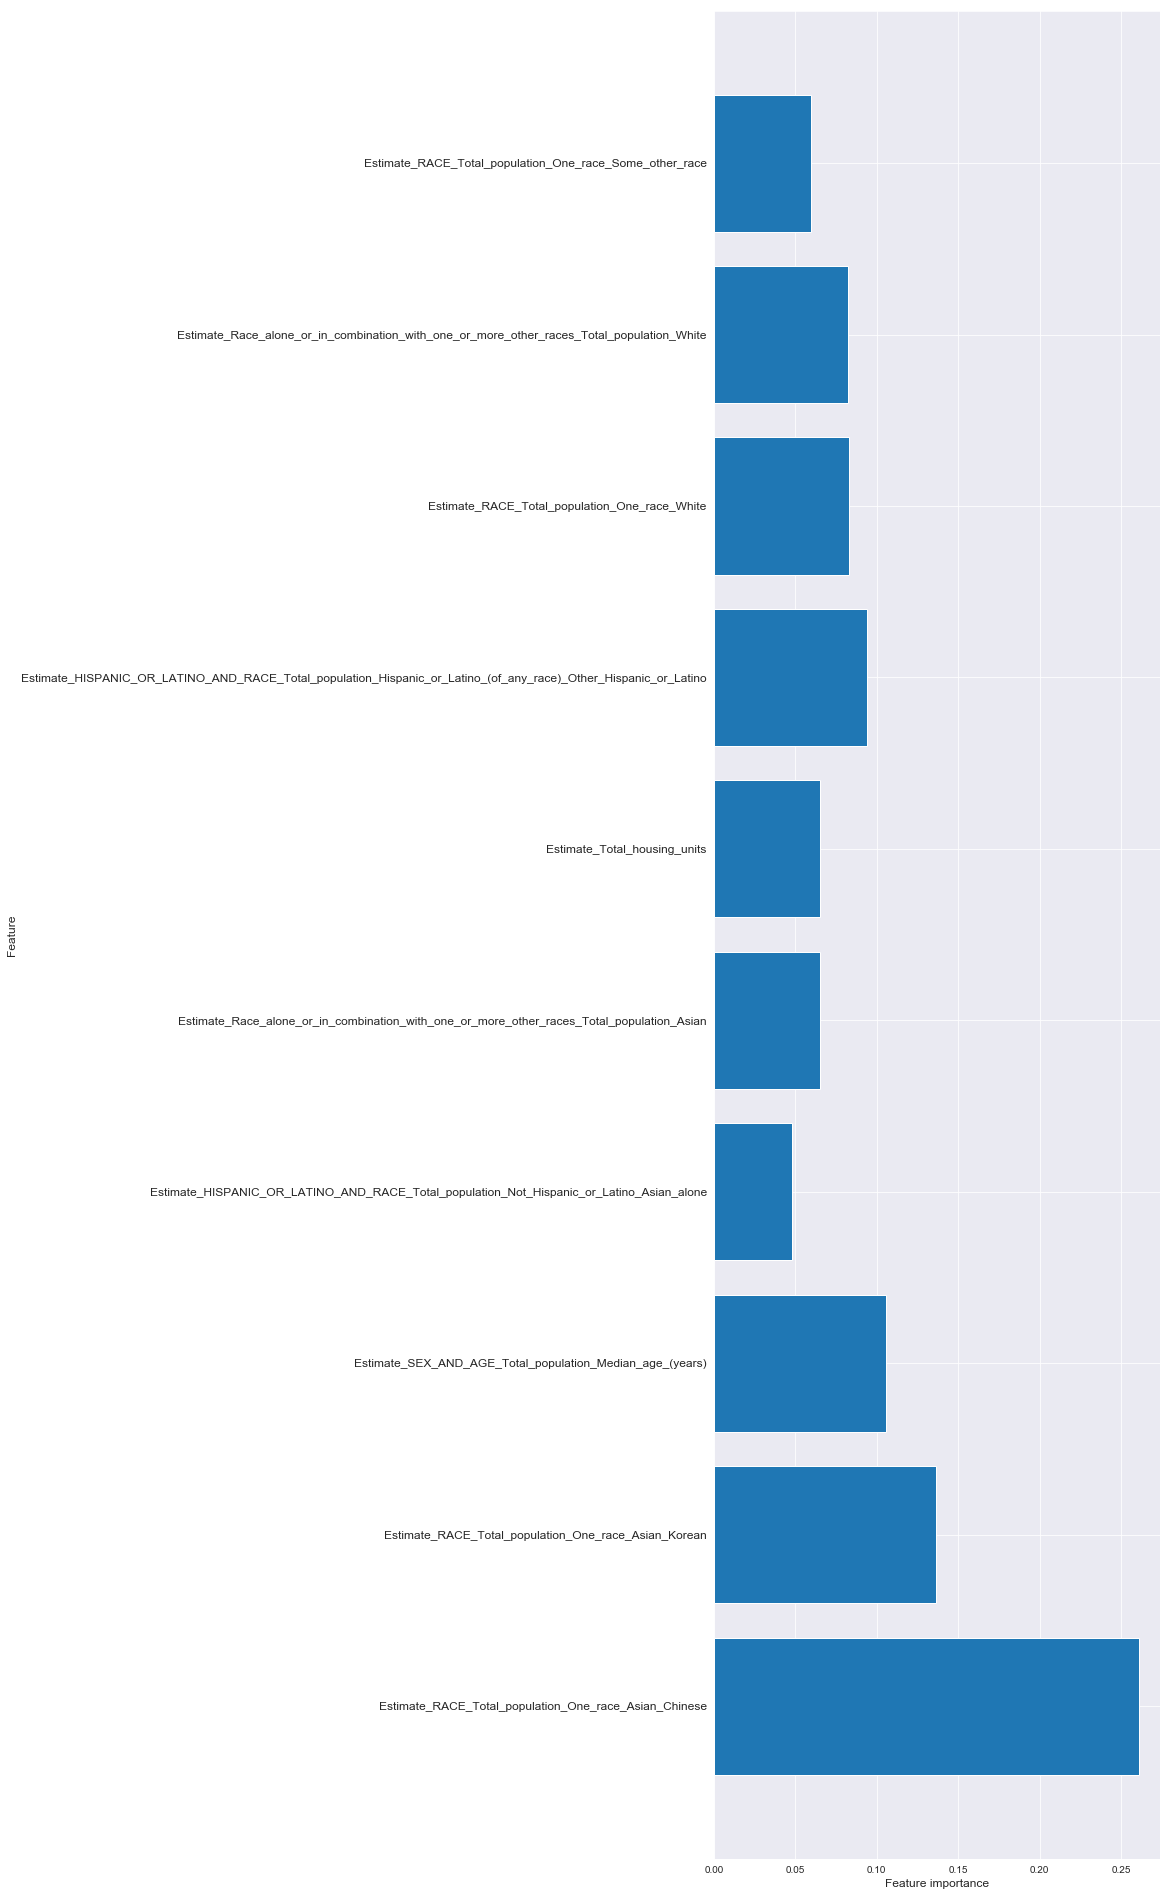

In [18]:
plot_feature_importances(forest)

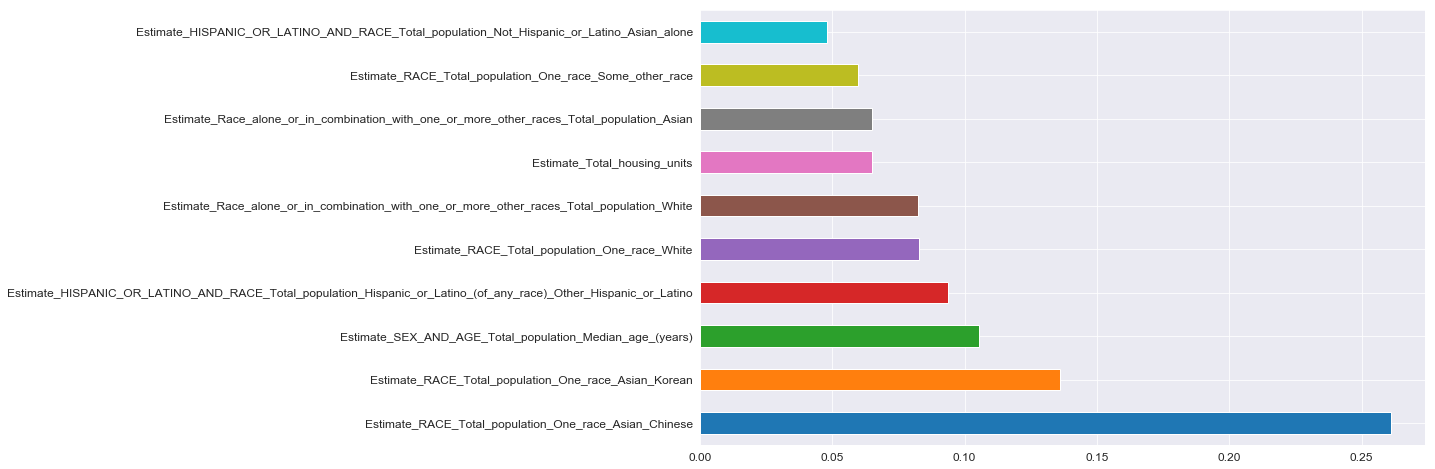

In [19]:
plt.figure(figsize=(13,8))
pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False).iloc[:20].plot.barh(fontsize=12);
feature = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False).iloc[:20]


In [20]:
forest.score(data_test,target_test)

0.8832079838009835

In [21]:
forest.score(data_train,target_train)

0.8798643642879527